In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import pandas as pd
from IPython.display import display, HTML

In [2]:
# Generate two random different integers for two create random, random seeds
random1 = random.randint(1,100)
random2 = random1
while random2 == random1:
    random2 = random.randint(1,100)


class Sensitivities:
    def __init__(self, T, K, r, S, sigma):
        self.T = T
        self.K = K
        self.r = r
        self.S = S
        self.sigma = sigma
        
    def bs_delta(self):
        """ 
        Returns the black scholes delta at time t. 
        """
        return norm.cdf((np.log(self.S/self.K) + (self.r + 0.5*self.sigma ** 2) * (self.T)) / (self.sigma * np.sqrt(self.T)))
#         return norm.cdf((np.log(self.S/self.K) + (self.r - 0.5*self.sigma ** 2) * (self.T)) / (self.sigma * np.sqrt(self.T))) - 1
        
    def sim_price_path(self, S, seed, num_sims, epsilon=0):
        np.random.seed(seed) # Set the seed for reproducibility
        z = np.random.standard_normal(num_sims)
        ST = (self.S + epsilon) * np.exp((self.r - 0.5 * self.sigma**2) * self.T + self.sigma * np.sqrt(self.T) * z)
        return ST

    def run_bump_sim(self, epsilon, seed1, seed2, num_sims, same_seed=True, digital=False):
        """
        perform bump and revalue method
        """
        if same_seed:
            # get expectation without the bump of the value of the option
            price_path = self.sim_price_path(self.S, seed1, num_sims)
            # get expectation of the option value with the bump
            bumped_price_path = self.sim_price_path(self.S, seed1, num_sims, epsilon = epsilon)
        else:
            # get expectation without the bump of the value of the option
            price_path = self.sim_price_path(self.S, seed1, num_sims)
            # get expectation of the option value with the bump
            bumped_price_path = self.sim_price_path(self.S, seed2, num_sims, epsilon = epsilon)            
            
        # get the payoffs for each
        if digital == True:
            V_s_payoff, V_s_error_payoff = np.where(price_path > self.K, 1, 0), np.where(bumped_price_path > self.K, 1, 0)
        else:
            V_s_payoff, V_s_error_payoff = np.maximum(price_path - self.K, 0), np.maximum(bumped_price_path - self.K, 0)
        # Use the Euler formula to approx. delta
        delta_approx = abs(np.mean(V_s_error_payoff) - np.mean(V_s_payoff)) / epsilon
        return np.exp(-self.r * self.T) * delta_approx

sens = Sensitivities(T=1.0, K=99.0, r=0.06, S=100.0, sigma=0.2)

price_path = sens.sim_price_path(sens.S, seed=random1, num_sims=10000)

size = [10**x for x in range(4,8)]
epsilon_values = [0.01, 0.02, 0.5]
delta = sens.bs_delta()

data_dict = {'Size': ['$10^4$', '$10^5$', '$10^6$', '$10^7$']}
# use the same seed for the bumped and unbumped estimate of the value;
for eps in epsilon_values:
    delta_list_epsilon = []
    for N in size:
        delta_approx = sens.run_bump_sim(epsilon=eps, seed1=random1, seed2=random2, num_sims=N)
        delta = sens.bs_delta()
        relative_error_delta =  100*abs((delta_approx - delta)/delta)
        delta_list_epsilon.append(relative_error_delta)
    data_dict[r'$\epsilon =$ %.2f'%(eps)] = delta_list_epsilon

df = pd.DataFrame(data_dict)

print('Tables of relative errors for δ (in %) w.r.t Black-Scholes for various N and ε. \n')
print('For V and V_bumped of the Monte Carlo simulation', 
      f'both evaluated with the same random seed: \n Seed = np.random.seed({random1})')

display(HTML(df.to_html(index=False)))




size = [10**x for x in range(4,8)]
epsilon_values = [0.01, 0.02, 0.5]
delta = sens.bs_delta()

data_dict = {'Size': ['$10^4$', '$10^5$', '$10^6$', '$10^7$']}
# use the same seed for the bumped and unbumped estimate of the value;
for eps in epsilon_values:
    delta_list_epsilon = []
    for N in size:
        delta_approx = sens.run_bump_sim(epsilon=eps, seed1=random1, seed2=random2, num_sims=N, same_seed=False)
        relative_error_delta =  100*abs((delta_approx - delta)/delta)
        delta_list_epsilon.append(relative_error_delta)
    data_dict[r'$\epsilon =$ %.2f'%(eps)] = delta_list_epsilon

df = pd.DataFrame(data_dict)
print('For V and V_bumped of the Monte Carlo simulation', 
      f'evaluated with a different random seed: \n Seed 1 = np.random.seed({random1}), Seed 2 = np.random.seed({random2})')
display(HTML(df.to_html(index=False)))




Tables of relative errors for δ (in %) w.r.t Black-Scholes for various N and ε. 

For V and V_bumped of the Monte Carlo simulation both evaluated with the same random seed: 
 Seed = np.random.seed(3)


Size,$\epsilon =$ 0.01,$\epsilon =$ 0.02,$\epsilon =$ 0.50
$10^4$,2.707361,2.694732,2.178711
$10^5$,0.233746,0.222908,0.397162
$10^6$,0.103968,0.118115,0.766125
$10^7$,0.061937,0.075346,0.711299


For V and V_bumped of the Monte Carlo simulation evaluated with a different random seed: 
 Seed 1 = np.random.seed(3), Seed 2 = np.random.seed(44)


Size,$\epsilon =$ 0.01,$\epsilon =$ 0.02,$\epsilon =$ 0.50
$10^4$,5631.968195,2815.606209,112.478447
$10^5$,901.088110,450.572543,18.677513
$10^6$,271.458061,35.741556,8.832147
$10^7$,24.713581,87.645388,2.885104


N = 1000, completed
N = 10000, completed
N = 100000, completed
N = 1000000, completed
N = 10000000, completed


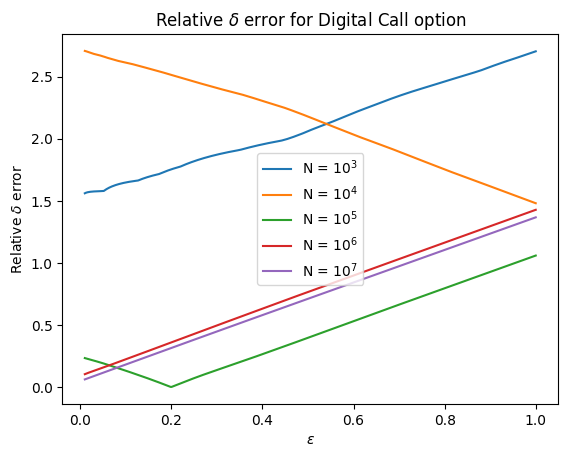

In [4]:
size = [10**x for x in range(3,8)]
data_dict = {'Size': ['$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$']}
# use same seed for the bumped and unbumped estimate of the value
labels = ['$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$']


epsilon_list = np.linspace(0.01,1, num=500)
delta_error = {}

for N in size:
    delta_error_size = []
    for eps in epsilon_list:
        delta_approx = sens.run_bump_sim(epsilon=eps, seed1=random1, seed2=random2, num_sims=N)
        delta = sens.bs_delta()
        relative_error_delta =  100*abs((delta_approx - delta)/delta)
        delta_error_size.append(relative_error_delta)
    delta_error[f'delta for N = {N}'] = delta_error_size
    print(f'N = {N}, completed')

for i, N in enumerate(size):
    delta_error_list = delta_error[f'delta for N = {N}']
    plt.plot(epsilon_list, delta_error_list, label = f'N = {labels[i]}')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Relative $\delta$ error ')
plt.title('Relative $\delta$ error for Digital Call option')
plt.legend()
plt.show()
